In [43]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
flight_data = pd.read_csv('datasets/flights/flights.csv')
flight_data

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,...,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00,Endeavor Air Inc.
336772,336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,...,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00,Endeavor Air Inc.
336773,336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,...,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00,Envoy Air
336774,336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,...,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00,Envoy Air


In [20]:
flight_data['air_time'].mean()

150.68646019807787

trim_mean(x,y) is a method from scipy.stats library which is like mean() but it is not sensitive to the noises
x -> column 
y -> percise

In [21]:
sp.trim_mean(flight_data['air_time'],0.1)

146.1634684621152

In [22]:
flight_data['air_time'].median()

129.0

In [23]:
flight_data['air_time'].mode()

0    42.0
Name: air_time, dtype: float64

In [24]:
flight_data['air_time'].var()

8777.498429877467

In [25]:
flight_data['air_time'].std()

93.68830465899929

<Axes: >

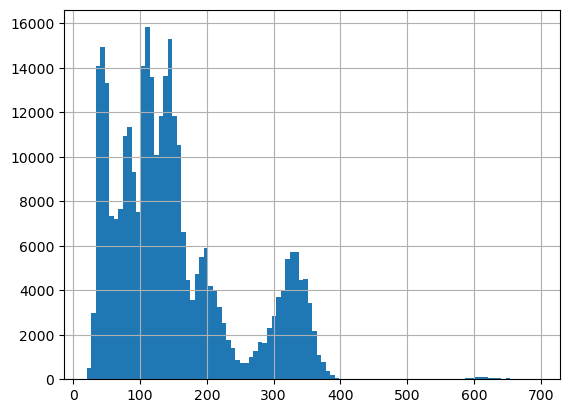

In [26]:
flight_data['air_time'].hist(bins=100)

<Axes: >

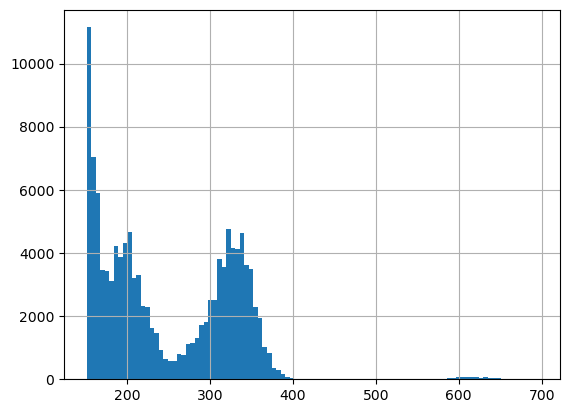

In [27]:
flight_data['air_time'][flight_data['air_time']>150].hist(bins=100)

<Axes: >

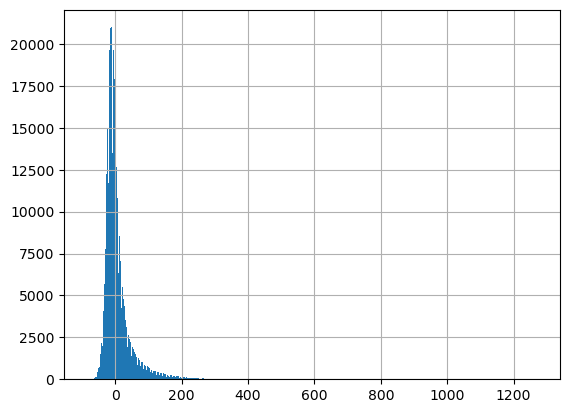

In [28]:
flight_data['arr_delay'].hist(bins=500)

As you can see this distirbution follows normal distirbution 
That means the mode is almost the mean and 68 percent of the data is included between (mean-std,mean+std)

<Axes: >

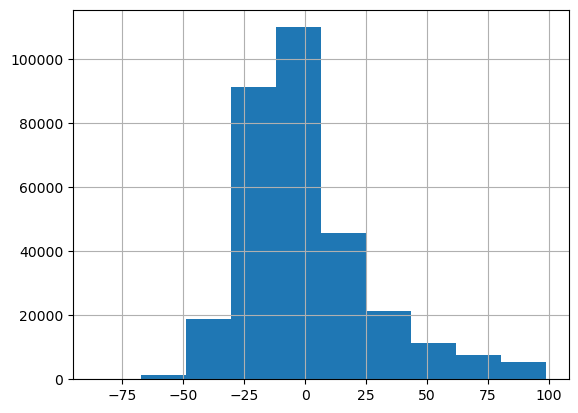

In [29]:
flight_data['arr_delay'][flight_data['arr_delay']<100].hist()

In [30]:
flight_data['arr_delay'][flight_data['arr_delay']<100].mean()

-0.16569653274241908

In [31]:
flight_data['arr_delay'][flight_data['arr_delay']<100].mean() + flight_data['arr_delay'][flight_data['arr_delay']<100].std()

26.33182154440009

In [32]:
flight_data['arr_delay'][flight_data['arr_delay']<100].mean() - flight_data['arr_delay'][flight_data['arr_delay']<100].std()

-26.66321460988493

We use skewness to see where is the data distirbuted more
skewness + -> to the right
skewness - -> to the left
skewness 0 -> normal

In [33]:
flight_data['arr_delay'][flight_data['arr_delay']<100].skew()

1.2539179317586369

Kurtosis shows the tailedness of a data

In [34]:
flight_data['arr_delay'][flight_data['arr_delay']<100].kurtosis()

1.8353659662635664

Correlation is used to show the relevance between two variables
corr + -> when a goes up b goes up
corr - -> when a goes down b goes down
corr 0 -> no relevance

In [41]:
flight_data.corr(numeric_only=True)

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
id,1.000000,NaN,0.071779,0.087852,0.002172,0.004076,0.049713,-0.024680,-0.013373,0.018613,0.002676,-0.032866,0.012526,0.003150,0.022619
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.071779,NaN,1.000000,0.002942,-0.003932,-0.004573,-0.020057,-0.002520,-0.004173,-0.017382,-0.000834,0.010924,0.021636,-0.005227,0.015528
day,0.087852,NaN,0.002942,1.000000,-0.000467,-0.000014,0.000420,-0.005537,-0.002403,-0.000319,-0.001791,0.002236,0.003041,-0.000055,0.000987
dep_time,0.002172,NaN,-0.003932,-0.000467,1.000000,0.954617,0.260231,0.660779,0.784682,0.232306,0.041957,-0.014619,-0.013998,0.953306,0.091577
sched_dep_time,0.004076,NaN,-0.004573,-0.000014,0.954617,1.000000,0.198887,0.642680,0.783342,0.173896,0.036495,-0.015532,-0.017995,0.999148,0.082960
dep_delay,0.049713,NaN,-0.020057,0.000420,0.260231,0.198887,1.000000,0.028729,0.160488,0.914803,0.054734,-0.022405,-0.021671,0.198226,0.028441
arr_time,-0.024680,NaN,-0.002520,-0.005537,0.660779,0.642680,0.028729,1.000000,0.788997,0.024482,0.025042,0.054296,0.046991,0.642651,0.040969
sched_arr_time,-0.013373,NaN,-0.004173,-0.002403,0.784682,0.783342,0.160488,0.788997,1.000000,0.133261,0.021594,0.078918,0.068726,0.783283,0.050321
arr_delay,0.018613,NaN,-0.017382,-0.000319,0.232306,0.173896,0.914803,0.024482,0.133261,1.000000,0.072862,-0.035297,-0.061868,0.173456,0.021522


Calculate with spearman method

In [42]:
flight_data.corr(numeric_only=True, method='spearman')

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
id,1.000000,NaN,0.068423,0.087983,0.002409,0.004131,0.039394,-0.021611,-0.011347,-0.037711,0.004178,-0.047133,0.005529,0.002773,0.022435
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.068423,NaN,1.000000,0.002923,-0.004394,-0.004647,-0.016497,-0.003759,-0.004762,-0.014652,0.004478,0.005213,0.019678,-0.005464,0.014267
day,0.087983,NaN,0.002923,1.000000,-0.000463,-0.000080,0.006105,-0.004305,-0.001632,-0.000133,-0.000430,0.002645,0.004180,-0.000123,0.001157
dep_time,0.002409,NaN,-0.004394,-0.000463,1.000000,0.971714,0.289806,0.803024,0.877109,0.205734,0.034215,-0.030119,-0.028804,0.969437,0.090737
sched_dep_time,0.004131,NaN,-0.004647,-0.000080,0.971714,1.000000,0.232511,0.785586,0.882137,0.156957,0.032365,-0.029447,-0.032579,0.997958,0.094532
dep_delay,0.039394,NaN,-0.016497,0.006105,0.289806,0.232511,1.000000,0.191679,0.217250,0.626361,-0.027184,0.078865,0.076324,0.229805,0.062636
arr_time,-0.021611,NaN,-0.003759,-0.004305,0.803024,0.785586,0.191679,1.000000,0.870649,0.119658,0.010006,0.056807,0.052827,0.784152,0.055942
sched_arr_time,-0.011347,NaN,-0.004762,-0.001632,0.877109,0.882137,0.217250,0.870649,1.000000,0.122800,0.001905,0.076897,0.072146,0.880184,0.062724
arr_delay,-0.037711,NaN,-0.014652,-0.000133,0.205734,0.156957,0.626361,0.119658,0.122800,1.000000,0.067617,-0.023115,-0.074101,0.156247,0.022519


Creating a data with normal distirbution
size -> the size of the data
loc -> mean of the data
scale -> std of the data

In [44]:
normal_data = sp.norm.rvs(size=10000, loc=0, scale=1)

Show the data visually

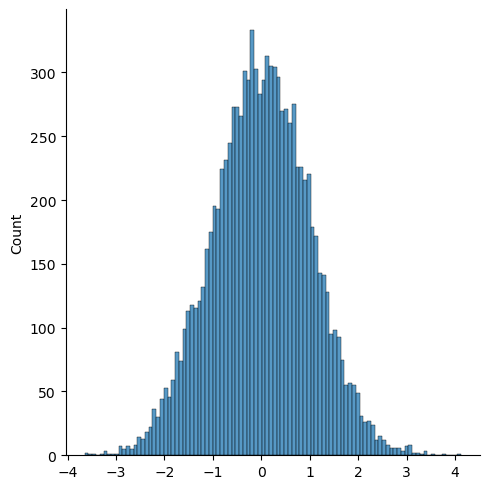

In [46]:
sns.displot(normal_data, bins=100, kde=False)

Creating uniform data

In [47]:
uniform_data = sp.uniform.rvs(size=10000, loc=0, scale=1)

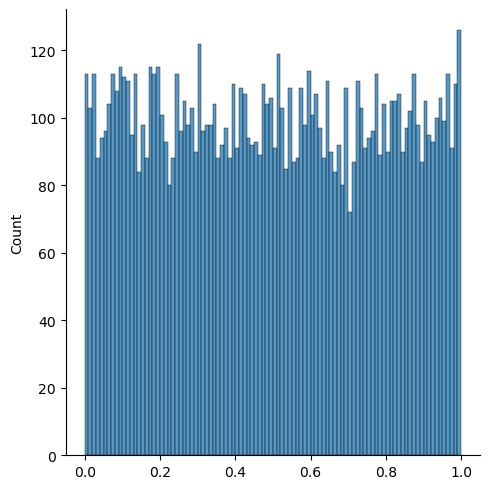

In [48]:
sns.displot(uniform_data, bins=100, kde=False)

Creating a data with bernouli distirbution
p -> the probability of win (1)

In [55]:
bernouli_data = sp.bernoulli.rvs(size=10000 ,p=0.2)
print(bernouli_data)

[0 0 0 ... 0 0 1]


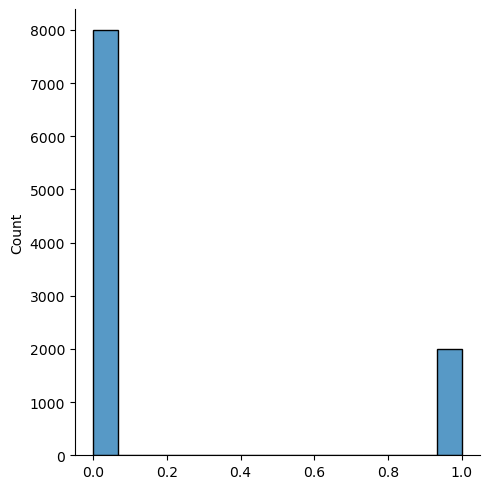

In [56]:
sns.displot(bernouli_data)

Creating bionomial data
n -> the number of bernouli tests

In [58]:
bionomial_data = sp.binom.rvs(size=10000, n=100, p=0.4)
print(bionomial_data)

[36 37 33 ... 43 43 37]


Kinda like normal distirbution

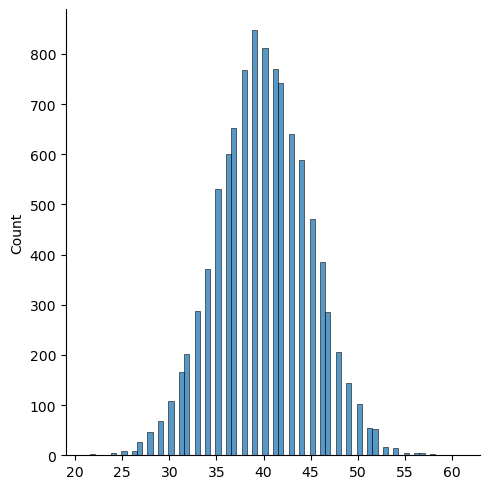

In [59]:
sns.displot(bionomial_data)

Creating data with multinomial distirbution
roll the dice for 6 times and do this for 20 times

In [61]:
# p is the chance of every number on dice
p = 1/6
multinomial_data = np.random.multinomial(n=6, pvals=[p,p,p,p,p,p],size=20)
print(multinomial_data)

[[1 3 0 0 1 1]
 [1 1 2 0 1 1]
 [0 1 2 1 2 0]
 [1 0 0 1 3 1]
 [1 2 0 0 0 3]
 [1 1 1 2 0 1]
 [2 1 0 1 0 2]
 [2 1 0 1 2 0]
 [1 0 1 2 0 2]
 [2 0 1 1 1 1]
 [1 1 2 0 1 1]
 [1 0 0 2 2 1]
 [1 2 1 0 0 2]
 [1 2 0 0 0 3]
 [0 2 0 1 2 1]
 [1 1 2 0 1 1]
 [0 2 1 2 0 1]
 [2 1 1 1 1 0]
 [1 0 2 0 1 2]
 [0 2 3 0 0 1]]
